# An√°lise Explorat√≥ria dos Dados
* Conjunto de dados: `spanish_wines` (qualidade do vinho espanhol)
* Equipe Datatives:
  - Mike Alcantara
  - Milena Ribeiro
  - M√ºller Pereira
  - Rene Francisco Ferreira Santos  
  - Welder Garrido
  

## Prepara√ß√£o
 - Carregamento de bibliotecas
 - Configura√ß√£o de estilo dos gr√°ficos
 - Leitura do conjunto de dados

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import Markdown
import seaborn as sns
import numpy as np
import itertools

In [ ]:
# @title Leitura do conjunto de dados

df = pd.read_csv('https://raw.githubusercontent.com/atlantico-academy/datasets/main/spanish_wines.csv')

In [ ]:
# @title Informa√ß√µes iniciais
display(Markdown("### Primeiras linhas"))
display(df.head())

display(Markdown("### √öltimas linhas"))
display(df.tail())

display(Markdown("### Informa√ß√£o das vari√°veis"))
df.info()

display(Markdown("### Quantidade de valores √∫nicos"))
df.nunique()

### Primeiras linhas

winery           wine  year  rating  num_reviews country  \
0  Teso La Monja          Tinto  2013     4.9           58  Espana   
1         Artadi  Vina El Pison  2018     4.9           31  Espana   
2   Vega Sicilia          Unico  2009     4.8         1793  Espana   
3   Vega Sicilia          Unico  1999     4.8         1705  Espana   
4   Vega Sicilia          Unico  1996     4.8         1309  Espana   

             region   price                  type  body  acidity  
0              Toro  995.00              Toro Red   5.0      3.0  
1    Vino de Espana  313.50           Tempranillo   4.0      2.0  
2  Ribera del Duero  324.95  Ribera Del Duero Red   5.0      3.0  
3  Ribera del Duero  692.96  Ribera Del Duero Red   5.0      3.0  
4  Ribera del Duero  778.06  Ribera Del Duero Red   5.0      3.0

### √öltimas linhas

winery             wine  year  rating  num_reviews  \
7495               Contino          Reserva  2016     4.2          392   
7496  Conreria d'Scala Dei    Les Brugueres  2018     4.2          390   
7497           Mustiguillo  Finca Terrerazo  2017     4.2          390   
7498           Matarromera     Gran Reserva  2011     4.2          389   
7499              Sei Solo         Preludio  2016     4.2          388   

     country            region  price                  type  body  acidity  
7495  Espana             Rioja  19.98             Rioja Red   4.0      3.0  
7496  Espana          Priorato  16.76           Priorat Red   4.0      3.0  
7497  Espana      El Terrerazo  24.45                   Red   4.0      3.0  
7498  Espana  Ribera del Duero  64.50  Ribera Del Duero Red   5.0      3.0  
7499  Espana  Ribera del Duero  31.63  Ribera Del Duero Red   5.0      3.0

### Informa√ß√£o das vari√°veis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


### Quantidade de valores √∫nicos

winery          480
wine            847
year             71
rating            8
num_reviews     817
country           1
region           76
price          1292
type             21
body              4
acidity           3
dtype: int64

In [ ]:
# @title Dados faltantes

# percentual de dados faltantes em cada coluna

round((df.isna()).sum() / df.shape[0] * 100, 2)

winery          0.00
wine            0.00
year            0.03
rating          0.00
num_reviews     0.00
country         0.00
region          0.00
price           0.00
type            7.27
body           15.59
acidity        15.59
dtype: float64

---
**Poss√≠veis causas dos dados faltantes:**

- `year` (0,03%):	Erros de extra√ß√£o ou dados hist√≥ricos incompletos.

- `type` (7,27%):	Categoria n√£o informada, vinho gen√©rico ou falta de padroniza√ß√£o na coleta.

- `body` e `acidity` (15,59%):	Avalia√ß√µes subjetivas ausentes; nem todos os vinhos foram analisados sensorialmente.
---

## Caracter√≠sticas do Dataset

---
A partir das informa√ß√µes iniciais, podemos dizer que:
 - O conjunto de dados tem 7500 unidades amostrais com 11 vari√°veis
 - Classifica√ß√£o das vari√°veis:
    - Quantitativa cont√≠nua: `rating`, `price`
    - Quantitativa discreta: `year`, `num_reviews`
    - Qualitativa nominal: `winery`, `wine`, `country`, `region`, `type`
    - Qualitativa ordinal: `body`, `acidity`
---

In [ ]:
#@title Dicion√°rio de Dados

df_dict = pd.DataFrame(
    [
        {'variavel': 'winery', 'descricao': 'nome da vinicola', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'wine', 'descricao': 'nome do vinho', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'year', 'descricao': 'ano em que as uvas foram colhidas', 'tipo': 'quantitativa', 'subtipo': 'discreta'},
        {'variavel': 'rating', 'descricao': 'avaliacao do vinho', 'tipo': 'quantitativa', 'subtipo': 'continua'},
        {'variavel': 'num_reviews', 'descricao': 'numero de avaliacoes do vinho', 'tipo': 'quantitativa', 'subtipo': 'discreta'},
        {'variavel': 'country', 'descricao': 'pais de origem do vinho (Espanha)', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'region', 'descricao': 'regiao do vinho', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'price', 'descricao': 'preco do vinho (‚Ç¨)', 'tipo': 'quantitativa', 'subtipo': 'continua'},
        {'variavel': 'type', 'descricao': 'variedade do vinho', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'body', 'descricao': 'corpo do vinho', 'tipo': 'qualitativa', 'subtipo': 'ordinal'},
        {'variavel': 'acidity', 'descricao': 'acidez do vinho', 'tipo': 'qualitativa', 'subtipo': 'ordinal'}

    ]
)
df_dict

variavel                          descricao          tipo   subtipo
0        winery                   nome da vinicola   qualitativa   nominal
1          wine                      nome do vinho   qualitativa   nominal
2          year  ano em que as uvas foram colhidas  quantitativa  discreta
3        rating                 avaliacao do vinho  quantitativa  continua
4   num_reviews      numero de avaliacoes do vinho  quantitativa  discreta
5       country  pais de origem do vinho (Espanha)   qualitativa   nominal
6        region                    regiao do vinho   qualitativa   nominal
7         price                 preco do vinho (‚Ç¨)  quantitativa  continua
8          type                 variedade do vinho   qualitativa   nominal
9          body                     corpo do vinho   qualitativa   ordinal
10      acidity                    acidez do vinho   qualitativa   ordinal

In [ ]:
df['year'].unique()

array(['2013', '2018', '2009', '1999', '1996', '1998', '2010', '1995',
       '2015', '2011', '2016', '1970', '1946', '1962', '2019', '2004',
       'N.V.', '1931', '1979', '2005', '2020', '2014', '1985', '1929',
       '2007', '2012', '2017', '2008', nan, '2006', '2000', '2003',
       '2002', '1991', '1994', '1990', '1989', '1987', '1986', '1981',
       '2001', '1968', '1964', '1982', '1974', '1983', '1955', '1980',
       '1972', '1953', '1958', '1942', '1965', '1992', '1973', '1997',
       '1967', '1975', '1910', '1961', '1954', '1988', '1969', '1951',
       '1928', '1976', '1949', '2021', '1959', '1922', '1978', '1925'],
      dtype=object)

In [ ]:
# Converter 'year' para num√©rico e remover linhas com NaN
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df = df.dropna(subset=["year"]).copy()  # Remove linhas onde 'year' √© NaN
df["year"] = df["year"].astype(int)  # Converter para inteiro

In [ ]:
df['year'].unique()

array([2013, 2018, 2009, 1999, 1996, 1998, 2010, 1995, 2015, 2011, 2016,
       1970, 1946, 1962, 2019, 2004, 1931, 1979, 2005, 2020, 2014, 1985,
       1929, 2007, 2012, 2017, 2008, 2006, 2000, 2003, 2002, 1991, 1994,
       1990, 1989, 1987, 1986, 1981, 2001, 1968, 1964, 1982, 1974, 1983,
       1955, 1980, 1972, 1953, 1958, 1942, 1965, 1992, 1973, 1997, 1967,
       1975, 1910, 1961, 1954, 1988, 1969, 1951, 1928, 1976, 1949, 2021,
       1959, 1922, 1978, 1925])

---
Na hora de plotar as vair√°veis quantitivas deu um erro, pois `year` estava como object. Al√©m disso tinham valores "N.V." e "nan", que foram removidos.

---

## An√°lise Univariada

In [ ]:
# @title Estat√≠stica Descritiva
display(Markdown("### Vari√°veis qualitativas"))
print(df.describe(include='object'))

display(Markdown("### Vari√°veis quantitativas"))
print(df.describe())

### Vari√°veis qualitativas

         winery     wine country region       type
count      7210     7210    7210   7210       6672
unique      445      777       1     72         21
top     Contino  Reserva  Espana  Rioja  Rioja Red
freq        457      467    7210   2440       2357


### Vari√°veis quantitativas

              year       rating   num_reviews        price         body  \
count  7210.000000  7210.000000   7210.000000  7210.000000  6070.000000   
mean   2013.495839     4.255381    448.206935    61.508695     4.163756   
std       6.940450     0.118609    615.388822   152.837021     0.593981   
min    1910.000000     4.200000     25.000000     5.500000     2.000000   
25%    2011.000000     4.200000    389.000000    19.900000     4.000000   
50%    2015.000000     4.200000    404.000000    28.530000     4.000000   
75%    2017.000000     4.200000    415.000000    53.775000     5.000000   
max    2021.000000     4.900000  16505.000000  3119.080000     5.000000   

           acidity  
count  6070.000000  
mean      2.947117  
std       0.242883  
min       1.000000  
25%       3.000000  
50%       3.000000  
75%       3.000000  
max       3.000000  


---
 - A regi√£o `Rioja` √© a que mais possui registros, e `Rioja Red` √© o vinho que mais aparece.
 - `Contino` √© a vin√≠cula com maior frequ√™ncia, e `Reserva` o vinho mais popular.
 - O pre√ßo m√©dio do vinho √© de `61,50 ‚Ç¨`, com mediana de `28,53 ‚Ç¨`.
---

### Distribui√ß√£o das vari√°veis


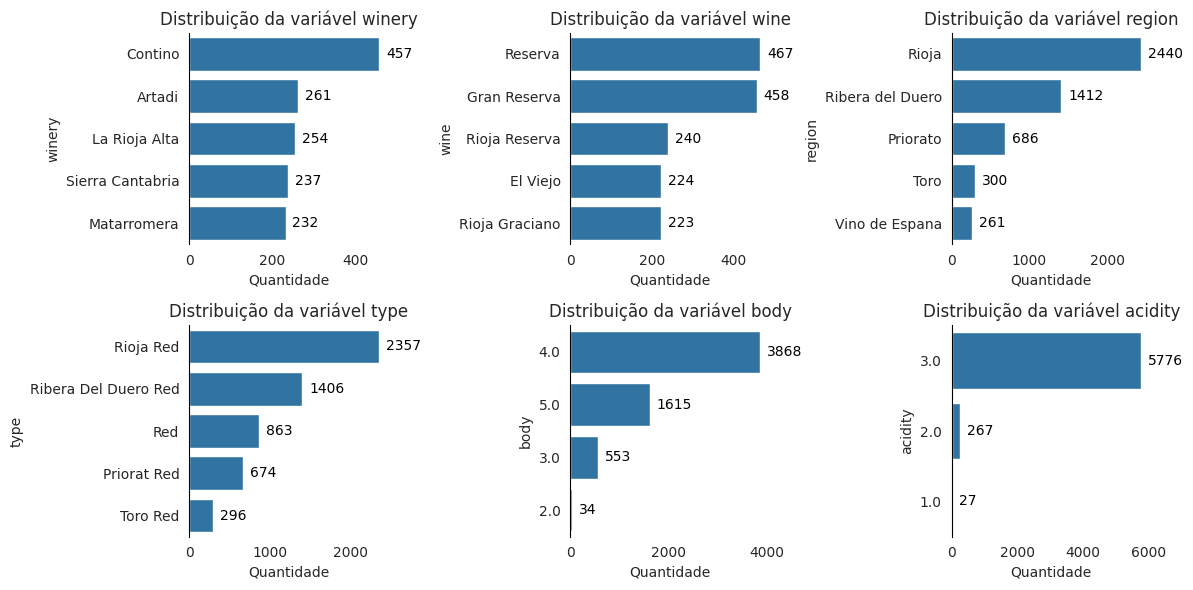

In [ ]:
# @title Vari√°veis qualitativas
variaveis_qualitativas = df_dict.query("tipo == 'qualitativa'").variavel.to_list()
variaveis_qualitativas = [v for v in variaveis_qualitativas if v != 'country']  # Remover 'country'

fig, axes = plt.subplots(figsize=(12, 6), ncols=3, nrows=2)
axes = axes.flatten()

for i, variavel in enumerate(variaveis_qualitativas):
    order = df[variavel].value_counts().index[:5] # Pegar os 5 valores mais frequentes
    ax = axes[i]
    # Criar a figura
    ax = sns.countplot(data=df, y=variavel, order=order, alpha=1, ax=ax)
    ax.bar_label(ax.containers[0], fmt="%d", color="black", label_type="edge", padding=5, fontsize=10)
    ax.set(title=f"Distribui√ß√£o da vari√°vel {variavel}", xlabel="Quantidade")
    for side in ["bottom", "top", "right"]:
        ax.spines[side].set_visible(False)
        ax.spines["left"].set_color("black")
plt.tight_layout()
plt.show()

---
### `Insights gerais`

- **Distribui√ß√£o desbalanceada:**	Algumas categorias dominam: `Rioja`, `Contino`, `Reserva`, `Rioja Red`.

- **Vari√°veis pouco informativas:**	`acidity` e `body` t√™m baixa variabilidade ‚Äî podem n√£o ajudar em modelos preditivos.

- **Necessidade de padroniza√ß√£:**	Nomes como `wine`, `type` e `region` podem ter redund√¢ncia ou inconsist√™ncia.

- **Combina√ß√µes √∫teis:**	Juntar `wine + winery`, ou `type + region` pode gerar features mais informativas.
---

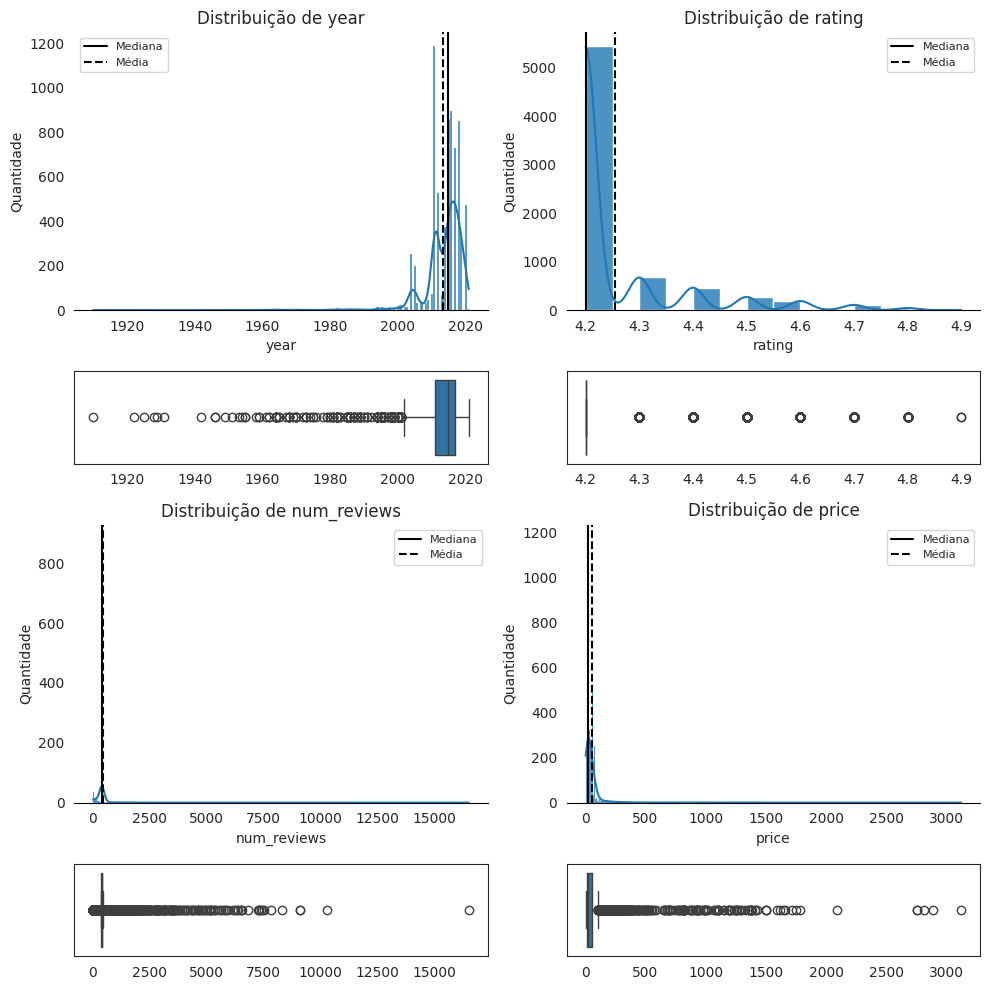

In [ ]:
# @title Vari√°veis quantitativas
variaveis_quantitativas = df_dict.query("tipo == 'quantitativa'").variavel.to_list()

n = len(variaveis_quantitativas)
ncols = 2
nrows = (n + 1) // ncols  # Arredondamento pra cima

fig, axes = plt.subplots(
    figsize=(10, 5 * nrows),
    ncols=ncols,
    nrows=nrows * 2,  # Cada vari√°vel usa 2 linhas: 1 para histograma/KDE, 1 para boxplot
    gridspec_kw={"height_ratios": [3, 1] * nrows}
)

axes = axes.reshape(nrows, 2, 2)  # (vari√°vel, [hist, box], coluna)

for idx, variavel in enumerate(variaveis_quantitativas):
    row = idx // ncols
    col = idx % ncols

    # Histograma + KDE
    ax = sns.histplot(data=df, x=variavel, ax=axes[row][0][col], kde=True, alpha=.8)
    ax.axvline(df[variavel].median(), color="black", label="Mediana")
    ax.axvline(df[variavel].mean(), color="black", linestyle="--", label="M√©dia")
    ax.set(title=f"Distribui√ß√£o de {variavel}", ylabel="Quantidade")
    ax.legend(fontsize=8)
    ax.title.set_size(12)
    ax.spines["bottom"].set_color("black")
    ax.grid(False, axis="x")
    for side in ["left", "top", "right"]:
        ax.spines[side].set_visible(False)

    # Boxplot
    sns.boxplot(data=df, x=variavel, ax=axes[row][1][col])
    axes[row][1][col].set(xlabel="")

# Ocultar subplots n√£o usados (caso o n√∫mero de vari√°veis n√£o seja par)
if n % ncols != 0:
    for j in range(2):
        axes[-1][j][1].axis("off")

plt.tight_layout()
plt.show()

---
### `Insights gerais`

- **Assimetria:**	Todas as vari√°veis, exceto talvez `year`, t√™m distribui√ß√£o fortemente assim√©trica.

- **Outliers:**	Muito presentes em `price`, `num_reviews` e `rating`.

-  **Escala ruim para modelagem:**	As vari√°veis `price` e `num_reviews` precisam de transforma√ß√µes (log, robust scaler).

- **Necessidade de tratamento:**	Prov√°vel limpeza: valores antigos em `year`, outliers extremos, e padroniza√ß√£o de formatos.

---

## An√°lise Bivariada

### Rela√ß√£o Entre Vari√°veis Quantitativas

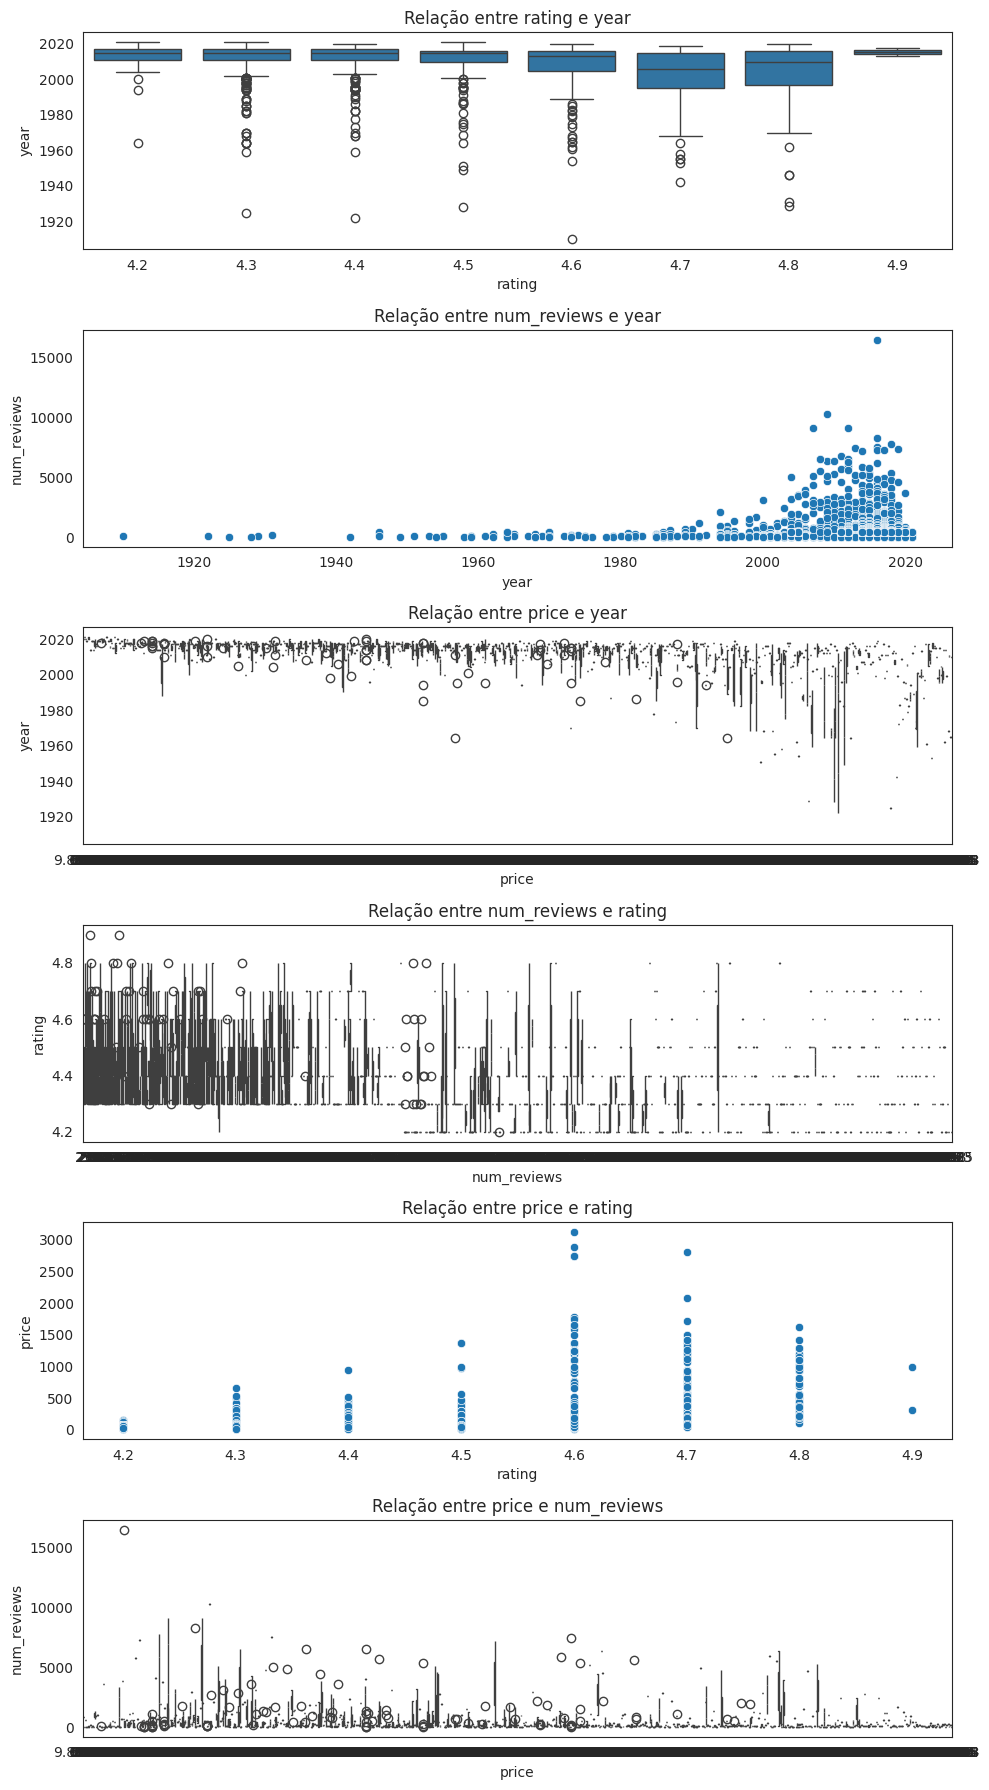

In [ ]:
# @title Comportamento par a par

combinacoes = list(itertools.combinations(variaveis_quantitativas, 2))
num_combinacoes = len(combinacoes)

# Ajustar n√∫mero de colunas e linhas dinamicamente
ncols = 1  # Por exemplo, fixar em 3 colunas
nrows = (num_combinacoes + ncols - 1) // ncols  # Calcular n√∫mero de linhas necess√°rio

fig, axes = plt.subplots(figsize=(10, 3 * nrows), ncols=ncols, nrows=nrows, squeeze=False)
axes = axes.flatten()

for i, (var_1, var_2) in enumerate(combinacoes):
    subtipos = df_dict.query('variavel == [@var_1, @var_2]').subtipo.to_list()
    if len(set(subtipos)) == 1:
        sns.scatterplot(data=df, x=var_1, y=var_2, ax=axes[i])
    else:
        sns.boxplot(data=df, y=var_1, x=var_2, ax=axes[i])
    axes[i].set(title=f"Rela√ß√£o entre {var_2} e {var_1}")

# Remover eixos n√£o utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

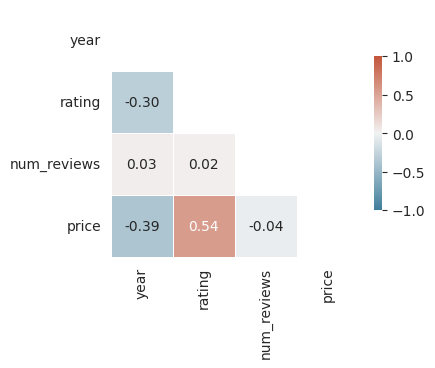

In [ ]:
# @title Correla√ß√£o

# Remover vari√°veis categ√≥ricas antes de calcular a correla√ß√£o
variaveis_categoricas = ['body', 'acidity']
corr = df.drop(columns=variaveis_categoricas).corr(numeric_only=True)

# Gerar uma m√°scara para o tri√¢ngulo
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set_style("white")

# Configurar a figura
f, ax = plt.subplots(figsize=(4, 4))

# Gerar um mapa de calor divergente
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Faz o mapa de calor com a m√°scara e a propor√ß√£o correta
chart = sns.heatmap(
    corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5},
    ax=ax, annot=True, fmt=".2f"
)
plt.show()

---
### `Insights gerais`

- **Assimetria:**	Todas as vari√°veis, exceto talvez `year`, t√™m distribui√ß√£o fortemente assim√©trica.

- **Outliers:**	Muito presentes em `price`, `num_reviews` e `rating`.

-  **Escala ruim para modelagem:**	As vari√°veis `price` e `num_reviews` precisam de transforma√ß√µes (log, robust scaler).

- **Necessidade de tratamento:**	Prov√°vel limpeza: valores antigos em `year`, outliers extremos, e padroniza√ß√£o de formatos.

- **Correla√ß√£o:** Maior rela√ß√£o entre `price`e `rating` indicando que, possivelmente, vinhos mais caros possuem melhores avalia√ß√µes.

---


## An√°lise multivariada

---
 - Ap√≥s a an√°lise descritiva das vari√°veis qualitativas e quantitativas, buscamos compreender como algumas dessas vari√°veis num√©ricas se relacionam entre si. Para isso, utilizamos a matriz de correla√ß√£o, que avalia o grau de associa√ß√£o entre duas vari√°veis quantitativas.

- A seguir, calculamos e visualizamos a matriz de correla√ß√£o entre as vari√°veis: rating, year e price.
---

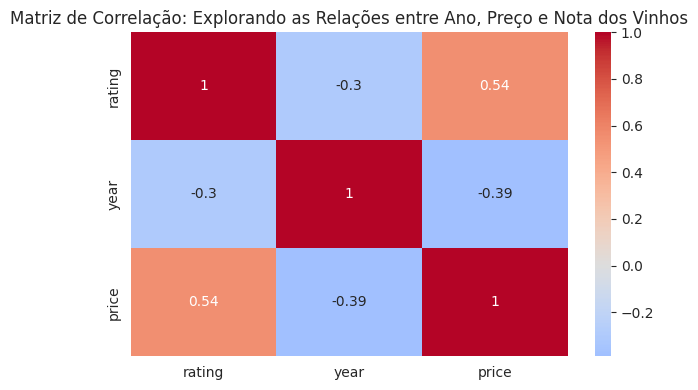

In [ ]:
# @title Matriz de correla√ß√£o

# Limpeza e preparo dos dados
df.loc[:, 'year'] = pd.to_numeric(df['year'], errors='coerce')
df = df.dropna(subset=['year']).copy()
df['year'] = df['year'].astype(int)

# Filtra apenas as colunas desejadas e remove valores ausentes
df_filtrado = df[['rating', 'year', 'price']].dropna()

# Calcula a matriz de correla√ß√£o real
correlation_matrix = df_filtrado.corr()

# Heatmap com a matriz real
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correla√ß√£o: Explorando as Rela√ß√µes entre Ano, Pre√ßo e Nota dos Vinhos')
plt.tight_layout()
plt.show()

---
- A rating tem uma correla√ß√£o negativa com o year (-0.30), ou seja, vinhos mais antigos tendem a ter notas mais altas. Isso faz sentido, j√° que vinhos envelhecidos podem ser mais valorizados.

- O price tamb√©m tem uma correla√ß√£o negativa com o year (-0.39), sugerindo que vinhos mais antigos s√£o, em m√©dia, mais caros.

- O rating e o price t√™m uma correla√ß√£o positiva (0.54), ou seja, vinhos mais caros tendem a ter notas mais altas.
---

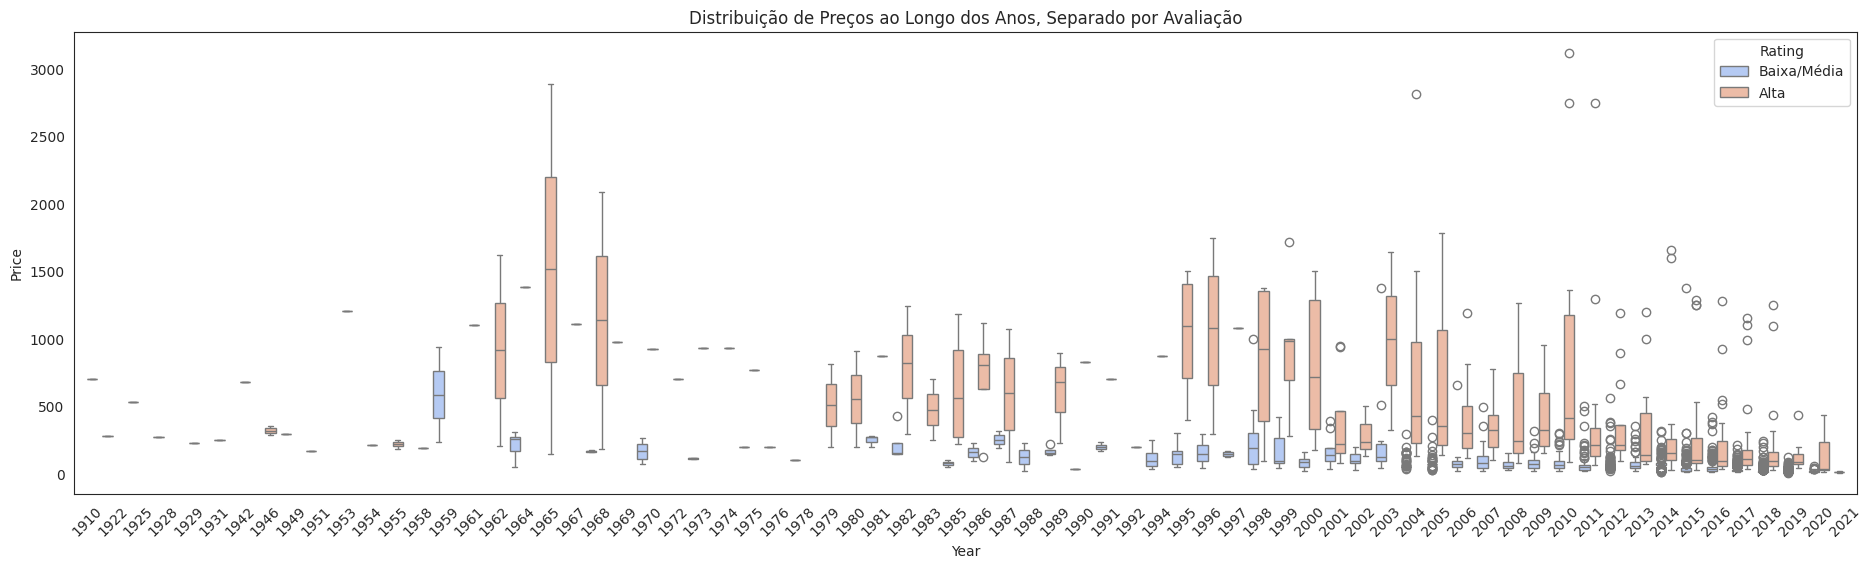

In [ ]:
# @title Distribui√ß√£o de Pre√ßos por Ano  e Faixa de Avalia√ß√£o
#criando uma categoria (ou faixa) de notas
df_filtrado['rating_bin'] = pd.cut(
    df_filtrado['rating'],
    bins=[df_filtrado['rating'].min(), 4.5, df_filtrado['rating'].max()],
    labels=["Baixa/M√©dia", "Alta"],
    include_lowest=True
)

plt.figure(figsize=(23, 6))
sns.boxplot(data=df_filtrado, x='year', y='price', hue=df_filtrado['rating_bin'], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Distribui√ß√£o de Pre√ßos ao Longo dos Anos, Separado por Avalia√ß√£o")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend(title="Rating")
plt.show()

---
Para aprofundar a an√°lise multivariada, foi criado um gr√°fico de boxplot que relaciona o pre√ßo dos vinhos com o ano de produ√ß√£o, separando-os por faixas de avalia√ß√£o (rating). As notas foram agrupadas em duas categorias: ‚ÄúBaixa/M√©dia‚Äù (at√© 4.5) e ‚ÄúAlta‚Äù (acima de 4.5).

O gr√°fico mostra que:

Em geral, vinhos mais antigos apresentam pre√ßos mais altos.

Vinhos com nota alta tendem a estar na faixa de pre√ßo mais elevada em v√°rios anos.

Existe maior variabilidade de pre√ßo entre os vinhos bem avaliados, especialmente em anos espec√≠ficos.

---

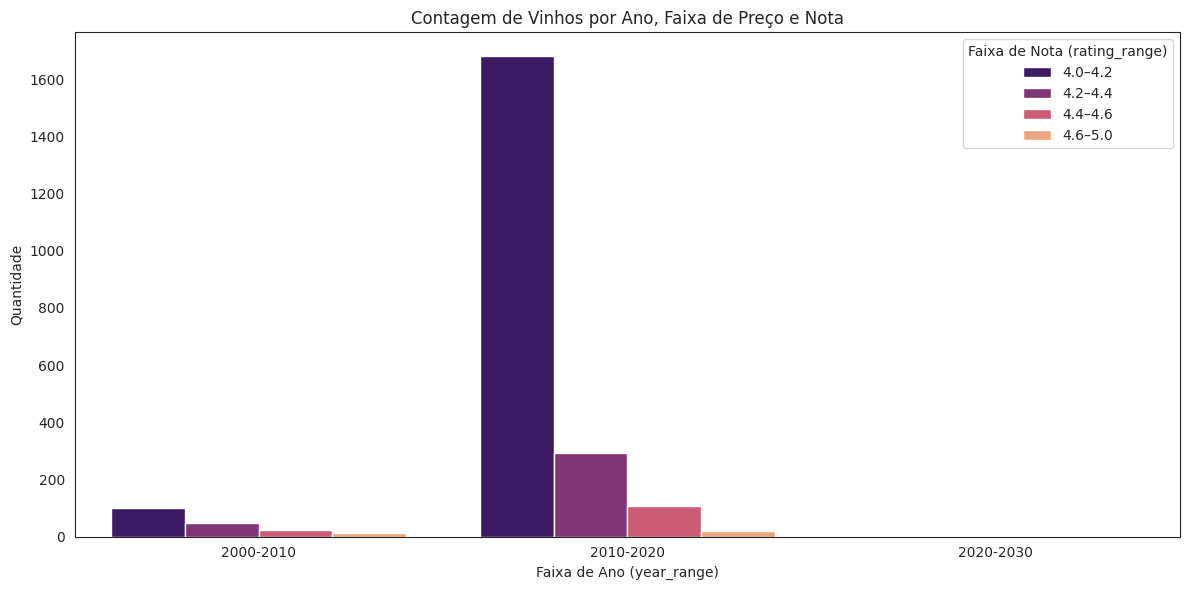

In [ ]:
# @title Gr√°fico de Conting√™ncia da An√°lise Multivariada
# Corrigir a cria√ß√£o da faixa de nota
bins = [4.0, 4.2, 4.4, 4.6, 5.0]
labels = ['4.0‚Äì4.2', '4.2‚Äì4.4', '4.4‚Äì4.6', '4.6‚Äì5.0']
df['rating_range'] = pd.cut(df['rating'], bins=bins, labels=labels, include_lowest=True)

# Criar a faixa de ano (year_range)
bins_year = [2000, 2010, 2020, 2030]  # Ajuste os anos conforme necess√°rio
labels_year = ['2000-2010', '2010-2020', '2020-2030']
df['year_range'] = pd.cut(df['year'], bins=bins_year, labels=labels_year, include_lowest=True)

# Criar a faixa de pre√ßo (price_range)
bins_price = [0, 1000, 2000, 3000, 4000]
labels_price = ['0-1000', '1000-2000', '2000-3000', '3000-4000']
df['price_range'] = pd.cut(df['price'], bins=bins_price, labels=labels_price, include_lowest=True)

# Remover linhas com valores nulos nas faixas
df_limpo = df.dropna(subset=['year_range', 'price_range', 'rating_range'])

# Criar tabela de conting√™ncia com os dados limpos
contingencia = pd.crosstab(
    [df_limpo['year_range'], df_limpo['price_range']],
    df_limpo['rating_range']
)

# Transformar em formato longo para usar no Seaborn
tabela_plot = contingencia.reset_index().melt(
    id_vars=['year_range', 'price_range'],
    var_name='rating_range',
    value_name='count'
)

# Gr√°fico de barras agrupadas com Seaborn
plt.figure(figsize=(12,6))
sns.barplot(
    data=tabela_plot,
    x='year_range',
    y='count',
    hue='rating_range',
    palette='magma',
    errorbar=None
)
plt.title('Contagem de Vinhos por Ano, Faixa de Pre√ßo e Nota')
plt.xlabel('Faixa de Ano (year_range)')
plt.ylabel('Quantidade')
plt.legend(title='Faixa de Nota (rating_range)')
plt.tight_layout()
plt.show()


---
- O gr√°fico acima representa uma tabela de conting√™ncia multivariada constru√≠da a partir da combina√ß√£o de tr√™s vari√°veis: ano de produ√ß√£o do vinho (year_range), faixa de pre√ßo (price_range) e faixa de nota (rating_range). A visualiza√ß√£o permite observar como a quantidade de vinhos se distribui ao longo dos anos, em diferentes faixas de pre√ßo e avalia√ß√£o.
---

In [ ]:
# @title An√°lise Multivariada Interativa

import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# --- VARI√ÅVEIS DISPON√çVEIS ---
variaveis_quantitativas = ['year', 'rating', 'num_reviews', 'price']
variaveis_qualitativas = ['winery', 'wine', 'region', 'type', 'body', 'acidity']

# --- FACET√ÅVEIS: Apenas vari√°veis com <= 10 categorias √∫nicas ---
facet√°veis = [v for v in variaveis_qualitativas if df[v].nunique() <= 10]

# --- WIDGETS ---
x_dropdown = widgets.Dropdown(
    options=variaveis_quantitativas,
    value='price',
    description='Eixo X:',
    layout=widgets.Layout(width='250px')
)

y_dropdown = widgets.Dropdown(
    options=variaveis_quantitativas,
    value='rating',
    description='Eixo Y:',
    layout=widgets.Layout(width='250px')
)

color_dropdown = widgets.Dropdown(
    options=variaveis_qualitativas,
    value='type',
    description='Colorir por:',
    layout=widgets.Layout(width='250px')
)

facet_dropdown = widgets.Dropdown(
    options=[None] + facet√°veis,
    value=None,
    description='Faceta:',
    layout=widgets.Layout(width='250px')
)

# Filtros por faixa de pre√ßo e ano
preco_min, preco_max = int(df['price'].min()), int(df['price'].max())
ano_min, ano_max = int(df['year'].min()), int(df['year'].max())

price_slider = widgets.IntRangeSlider(
    value=[preco_min, preco_max],
    min=preco_min,
    max=preco_max,
    step=1,
    description='Faixa Pre√ßo:',
    continuous_update=False,
    layout=widgets.Layout(width='500px')
)

year_slider = widgets.IntRangeSlider(
    value=[ano_min, ano_max],
    min=ano_min,
    max=ano_max,
    step=1,
    description='Ano:',
    continuous_update=False,
    layout=widgets.Layout(width='500px')
)

# --- FUN√á√ÉO PARA ATUALIZAR O GR√ÅFICO ---
def atualizar_grafico(x, y, color, facet, price_range, year_range):
    df_filtrado = df[
        (df['price'] >= price_range[0]) & (df['price'] <= price_range[1]) &
        (df['year'] >= year_range[0]) & (df['year'] <= year_range[1])
    ].copy()

    # Reduzir n√∫mero de categorias na faceta (para evitar erro no plotly)
    if facet is not None and df_filtrado[facet].nunique() > 6:
        top_categorias = df_filtrado[facet].value_counts().index[:6]
        df_filtrado = df_filtrado[df_filtrado[facet].isin(top_categorias)]

    fig = px.scatter(
        df_filtrado,
        x=x,
        y=y,
        color=color,
        facet_col=facet,
        opacity=0.6,
        hover_data=['wine', 'winery', 'region'],
        title=f"{y} vs {x} segmentado por {color}" + (f" e facetas por {facet}" if facet else ""),
        template="plotly_white"
    )
    fig.update_layout(height=600)
    fig.show()

# --- LAYOUT INTERATIVO ---
ui = widgets.VBox([
    widgets.HBox([x_dropdown, y_dropdown]),
    widgets.HBox([color_dropdown, facet_dropdown]),
    price_slider,
    year_slider
])

out = widgets.interactive_output(
    atualizar_grafico,
    {
        'x': x_dropdown,
        'y': y_dropdown,
        'color': color_dropdown,
        'facet': facet_dropdown,
        'price_range': price_slider,
        'year_range': year_slider
    }
)

# --- EXIBIR INTERFACE ---
display(ui, out)

Output()

## Tratamento de Dados

In [ ]:
# @title Drop coluna country
df = df.drop(columns=["country"]) # country s√≥ tinha uma valor ent√£o achamos melhor dropar a coluna.
df

winery             wine  year  rating  num_reviews  \
0            Teso La Monja            Tinto  2013     4.9           58   
1                   Artadi    Vina El Pison  2018     4.9           31   
2             Vega Sicilia            Unico  2009     4.8         1793   
3             Vega Sicilia            Unico  1999     4.8         1705   
4             Vega Sicilia            Unico  1996     4.8         1309   
...                    ...              ...   ...     ...          ...   
7495               Contino          Reserva  2016     4.2          392   
7496  Conreria d'Scala Dei    Les Brugueres  2018     4.2          390   
7497           Mustiguillo  Finca Terrerazo  2017     4.2          390   
7498           Matarromera     Gran Reserva  2011     4.2          389   
7499              Sei Solo         Preludio  2016     4.2          388   

                region   price                  type  body  acidity  \
0                 Toro  995.00              Toro Red   5.0      3.0   
1       Vino de Espana  313.50           Tempranillo   4.0      2.0   
2     Ribera del Duero  324.95  Ribera Del Duero Red   5.0      3.0   
3     Ribera del Duero  692.96  Ribera Del Duero Red   5.0      3.0   
4     Ribera del Duero  778.06  Ribera Del Duero Red   5.0      3.0   
...                ...     ...                   ...   ...      ...   
7495             Rioja   19.98             Rioja Red   4.0      3.0   
7496          Priorato   16.76           Priorat Red   4.0      3.0   
7497      El Terrerazo   24.45                   Red   4.0      3.0   
7498  Ribera del Duero   64.50  Ribera Del Duero Red   5.0      3.0   
7499  Ribera del Duero   31.63  Ribera Del Duero Red   5.0      3.0   

     rating_range year_range price_range  
0         4.6‚Äì5.0  2010-2020      0-1000  
1         4.6‚Äì5.0  2010-2020      0-1000  
2         4.6‚Äì5.0  2000-2010      0-1000  
3         4.6‚Äì5.0        NaN      0-1000  
4         4.6‚Äì5.0        NaN      0-1000  
...           ...        ...         ...  
7495      4.0‚Äì4.2  2010-2020      0-1000  
7496      4.0‚Äì4.2  2010-2020      0-1000  
7497      4.0‚Äì4.2  2010-2020      0-1000  
7498      4.0‚Äì4.2  2010-2020      0-1000  
7499      4.0‚Äì4.2  2010-2020      0-1000  

[7210 rows x 13 columns]

In [ ]:
# @title Imputa√ß√£o dos dados categ√≥ricos faltantes com aprendizagem de m√°quina
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Fun√ß√£o para imputar vari√°veis categ√≥ricas ausentes
def impute_missing_values(df, target_column):
    # Dividir os dados em treinamento e imputa√ß√£o
    train = df[df[target_column].notnull()]
    missing = df[df[target_column].isnull()]

    # One-hot encoding para vari√°veis preditoras
    X_train = pd.get_dummies(train.drop(columns=[target_column]), drop_first=True)
    y_train = train[target_column]

    X_missing = pd.get_dummies(missing.drop(columns=[target_column]), drop_first=True)
    # Garantir que as colunas correspondam entre treino e imputa√ß√£o
    X_missing = X_missing.reindex(columns=X_train.columns, fill_value=0)

    # Treinar o modelo
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Prever os valores ausentes
    missing[target_column] = model.predict(X_missing)

    # Atualizar o DataFrame original
    df.update(missing)
    return df

# Imputar valores ausentes para 'type'
df = impute_missing_values(df, 'type')

# Imputar valores ausentes para 'body'
df = impute_missing_values(df, 'body')

# Imputar valores ausentes para 'acidity'
df = impute_missing_values(df, 'acidity')

# Verificar se existem dados ausentes remanescentes
print("Dados faltantes ap√≥s imputa√ß√£o:")
print(df.isnull().sum())

<ipython-input-322-cbcf305f607e>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-322-cbcf305f607e>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Dados faltantes ap√≥s imputa√ß√£o:
winery            0
wine              0
year              0
rating            0
num_reviews       0
region            0
price             0
type              0
body              0
acidity           0
rating_range      0
year_range      165
price_range       0
dtype: int64


<ipython-input-322-cbcf305f607e>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Por que RandomForest?

---
**Lida naturalmente com classes (categorias):**
O Random Forest √© um modelo de classifica√ß√£o por natureza, ideal para prever r√≥tulos categ√≥ricos.

**Capta rela√ß√µes n√£o lineares:**
Ele detecta padr√µes complexos entre as vari√°veis ‚Äî o que √© √≥timo em datasets com vari√°veis mistas (quantitativas + qualitativas).

**Resistente a outliers e ru√≠do:**
Isso √© especialmente √∫til se o seu conjunto de dados ainda estiver "cru".

**Imputa√ß√£o por aprendizado supervisionado:**
Diferente de t√©cnicas simples (como preencher com a moda), o Random Forest aprende com os dados conhecidos para prever os ausentes, o que tende a ser mais preciso.

---

In [ ]:
# @title Mapeamento da vari√°vel body

# Mapear valores e converter para categ√≥rico ordenado
mapeamento_body = {
    1.0: "Muito leve",
    2.0: "Leve",
    3.0: "Medio",
    4.0: "Encorpado",
    5.0: "Muito encorpado"
}

df['body_imputed'] = df['body'].map(mapeamento_body)
df['body_imputed'] = pd.Categorical(
    df['body_imputed'],
    categories=["Muito leve", "Leve", "Medio", "Encorpado", "Muito encorpado"],
    ordered=True
)

df['body_imputed'].value_counts()

body_imputed
Encorpado          4771
Muito encorpado    1786
Medio               615
Leve                 38
Muito leve            0
Name: count, dtype: int64

In [ ]:
# @title Mapeamento da vari√°vel acidity

# Mapear valores e converter para categ√≥rico ordenado
mapeamento_acidity = {
    1.0: "Muito baixa",
    2.0: "Baixa",
    3.0: "Media",
    4.0: "Alta",
    5.0: "Muito alta"
}

df['acidity_imputed'] = df['acidity'].map(mapeamento_acidity)
df['acidity_imputed'] = pd.Categorical(
    df['acidity_imputed'],
    categories=["Muito baixa", "Baixa", "Media", "Alta", "Muito alta"],
    ordered=True
)

df['acidity_imputed'].value_counts()

acidity_imputed
Media          6893
Baixa           290
Muito baixa      27
Alta              0
Muito alta        0
Name: count, dtype: int64

In [ ]:
df.drop(['body','acidity'], axis=1, inplace=True)

In [ ]:
df.head()

winery           wine  year  rating  num_reviews            region  \
0  Teso La Monja          Tinto  2013     4.9           58              Toro   
1         Artadi  Vina El Pison  2018     4.9           31    Vino de Espana   
2   Vega Sicilia          Unico  2009     4.8         1793  Ribera del Duero   
3   Vega Sicilia          Unico  1999     4.8         1705  Ribera del Duero   
4   Vega Sicilia          Unico  1996     4.8         1309  Ribera del Duero   

    price                  type rating_range year_range price_range  \
0  995.00              Toro Red      4.6‚Äì5.0  2010-2020      0-1000   
1  313.50           Tempranillo      4.6‚Äì5.0  2010-2020      0-1000   
2  324.95  Ribera Del Duero Red      4.6‚Äì5.0  2000-2010      0-1000   
3  692.96  Ribera Del Duero Red      4.6‚Äì5.0        NaN      0-1000   
4  778.06  Ribera Del Duero Red      4.6‚Äì5.0        NaN      0-1000   

      body_imputed acidity_imputed  
0  Muito encorpado           Media  
1        Encorpado           Baixa  
2  Muito encorpado           Media  
3  Muito encorpado           Media  
4  Muito encorpado           Media

In [ ]:
# @title Dicion√°rio de dados
df_dict = pd.DataFrame([
        {
            'variavel': 'winery',
            'descricao': 'nome da vinicola',
            'tipo': 'qualitativa',
            'subtipo': 'nominal'
        },
        {
            'variavel': 'wine',
            'descricao': 'nome do vinho',
            'tipo': 'qualitativa',
            'subtipo': 'nominal'
        },
        {
            'variavel': 'year',
            'descricao': 'ano em que as uvas foram colhidas',
            'tipo': 'quantitativa',
            'subtipo': 'discreta'
        },
        {
            'variavel': 'rating',
            'descricao': 'classificacao media dada ao vinho pelos usuarios (de 1 a 5)',
            'tipo': 'quantitativa',
            'subtipo': 'continua'
        },
        {
            'variavel': 'num_reviews',
            'descricao': 'numero de avaliacoes do vinho',
            'tipo': 'quantitativa',
            'subtipo': 'discreta'
        },
        {
            'variavel': 'region',
            'descricao': 'regiao do vinho',
            'tipo': 'qualitativa',
            'subtipo': 'nominal'
        },
        {
            'variavel': 'price',
            'descricao': 'preco do vinho (‚Ç¨)',
            'tipo': 'quantitativa',
            'subtipo': 'continua'
        },
         {
            'variavel': 'type',
            'descricao': 'variedade do vinho',
            'tipo': 'qualitativa',
            'subtipo': 'nominal'
        },
        {
            'variavel': 'body_imputed',
            'descricao': 'rotulo de corpo',
            'tipo': 'qualitativa',
            'subtipo': 'ordinal'
        },
        {
            'variavel': 'acidity_imputed',
            'descricao': 'rotulo de acidez',
            'tipo': 'qualitativa',
            'subtipo': 'ordinal'
        }
    ])
df_dict

variavel                                          descricao  \
0           winery                                   nome da vinicola   
1             wine                                      nome do vinho   
2             year                  ano em que as uvas foram colhidas   
3           rating  classificacao media dada ao vinho pelos usuari...   
4      num_reviews                      numero de avaliacoes do vinho   
5           region                                    regiao do vinho   
6            price                                 preco do vinho (‚Ç¨)   
7             type                                 variedade do vinho   
8     body_imputed                                    rotulo de corpo   
9  acidity_imputed                                   rotulo de acidez   

           tipo   subtipo  
0   qualitativa   nominal  
1   qualitativa   nominal  
2  quantitativa  discreta  
3  quantitativa  continua  
4  quantitativa  discreta  
5   qualitativa   nominal  
6  quantitativa  continua  
7   qualitativa   nominal  
8   qualitativa   ordinal  
9   qualitativa   ordinal

In [ ]:
# @title Tratamento de outliers

from scipy.stats import zscore

# Lista de vari√°veis quantitativas
variaveis_quantitativas = ['year', 'rating', 'num_reviews', 'price']

# Copiar o DataFrame original
df_sem_outliers_zscore = df.copy()

# Calcular o Z-score apenas para as vari√°veis quantitativas
z_scores = df_sem_outliers_zscore[variaveis_quantitativas].apply(zscore)

# Criar uma m√°scara booleana: True onde todos os Z-scores est√£o dentro de ¬±3
mask = (z_scores.abs() < 3).all(axis=1)

# Aplicar a m√°scara ao DataFrame original
df_sem_outliers_zscore = df_sem_outliers_zscore[mask]

# Resultado
print(f"N√∫mero de linhas ap√≥s remo√ß√£o de outliers (Z-Score): {df_sem_outliers_zscore.shape[0]}")


N√∫mero de linhas ap√≥s remo√ß√£o de outliers (Z-Score): 6847


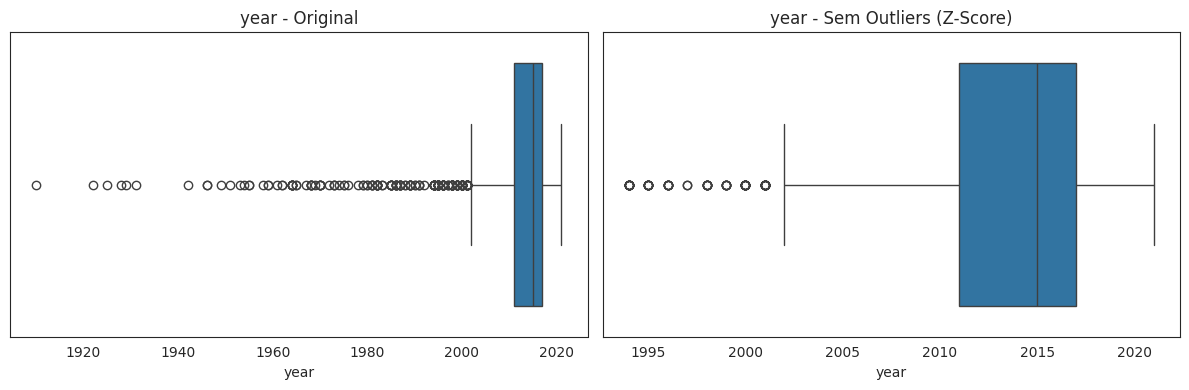

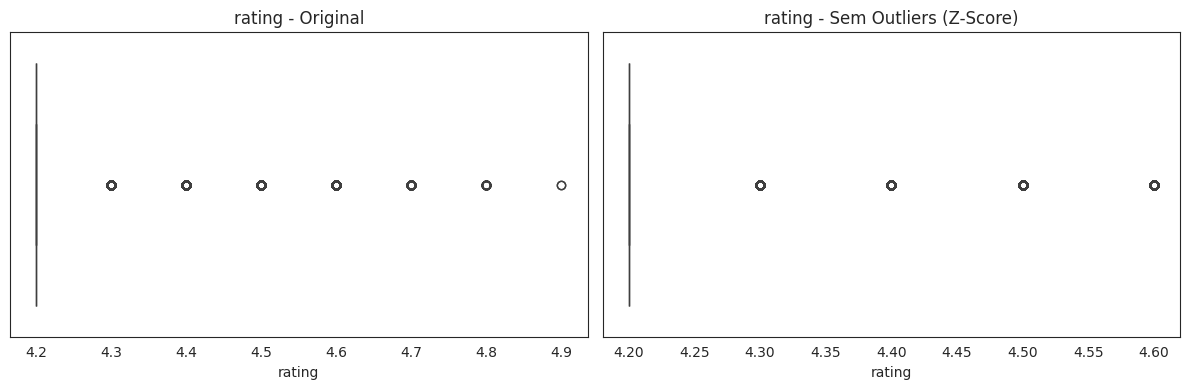

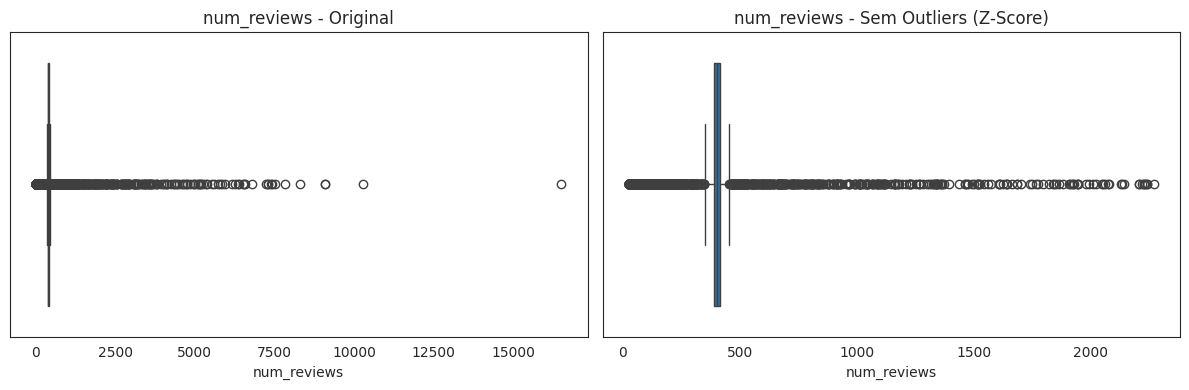

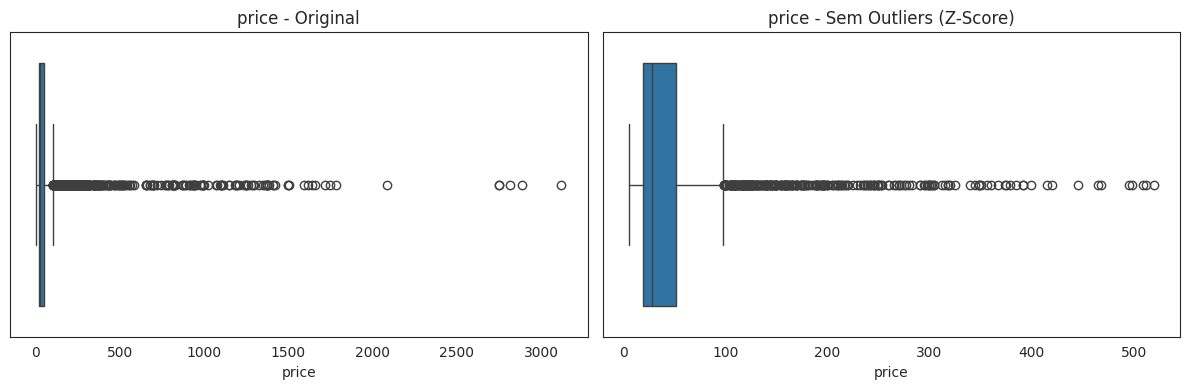

In [ ]:
for var in variaveis_quantitativas:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    sns.boxplot(data=df, x=var, ax=axs[0]).set_title(f"{var} - Original")
    sns.boxplot(data=df_sem_outliers_zscore, x=var, ax=axs[1]).set_title(f"{var} - Sem Outliers (Z-Score)")
    plt.tight_layout()
    plt.show()


## An√°lise Univariada


In [ ]:
# @title Resumo estat√≠stico p√≥s imputa√ß√£o

display(Markdown("### Vari√°veis qualitativas"))
print(df.describe(include=['object', 'category']))

display(Markdown("### Vari√°veis quantitativas"))
print(df.describe())

### Vari√°veis qualitativas

         winery     wine region       type rating_range year_range  \
count      7210     7210   7210       7210         7210       7045   
unique      445      777     72         21            4          3   
top     Contino  Reserva  Rioja  Rioja Red      4.0‚Äì4.2  2010-2020   
freq        457      467   2440       2359         5452       6303   

       price_range body_imputed acidity_imputed  
count         7210         7210            7210  
unique           4            4               3  
top         0-1000    Encorpado           Media  
freq          7159         4771            6893  


### Vari√°veis quantitativas

              year       rating   num_reviews        price
count  7210.000000  7210.000000   7210.000000  7210.000000
mean   2013.495839     4.255381    448.206935    61.508695
std       6.940450     0.118609    615.388822   152.837021
min    1910.000000     4.200000     25.000000     5.500000
25%    2011.000000     4.200000    389.000000    19.900000
50%    2015.000000     4.200000    404.000000    28.530000
75%    2017.000000     4.200000    415.000000    53.775000
max    2021.000000     4.900000  16505.000000  3119.080000


---
 Mantiveram-se os mesmos n√∫meros

---

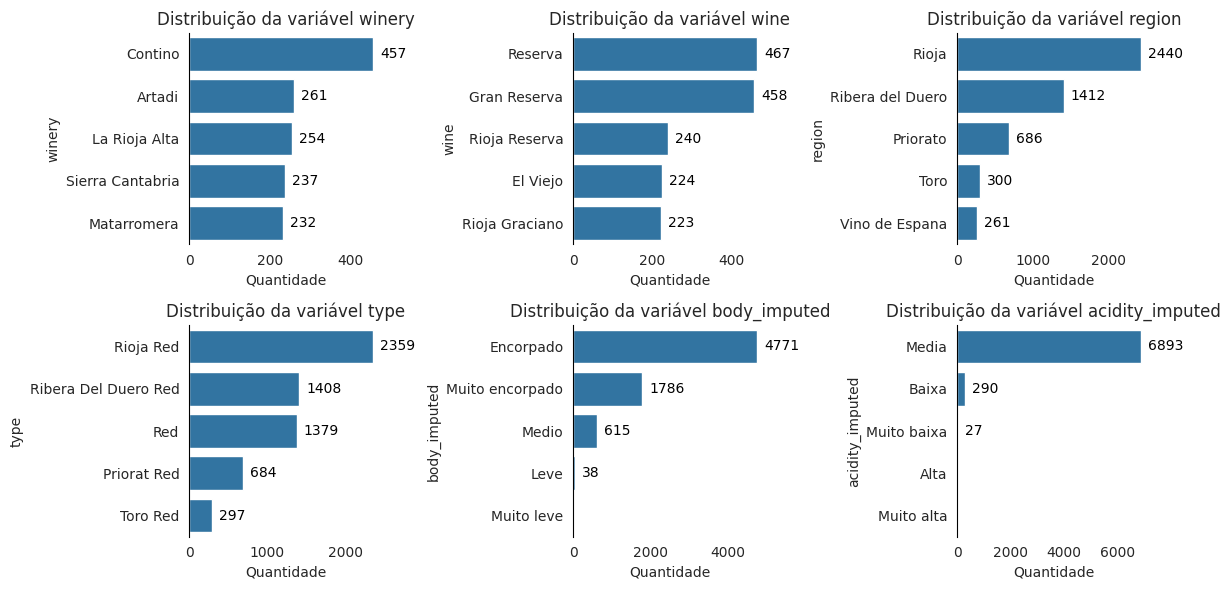

In [ ]:
# @title Vari√°veis qualitativas
variaveis_qualitativas = df_dict.query("tipo == 'qualitativa'").variavel.to_list()
variaveis_qualitativas = [v for v in variaveis_qualitativas if v != 'country']  # Remover 'country'

fig, axes = plt.subplots(figsize=(12, 6), ncols=3, nrows=2)
axes = axes.flatten()

for i, variavel in enumerate(variaveis_qualitativas):
    order = df[variavel].value_counts().index[:5] # Pegar os 5 valores mais frequentes
    ax = axes[i]
    # Criar a figura
    ax = sns.countplot(data=df, y=variavel, order=order, alpha=1, ax=ax)
    ax.bar_label(ax.containers[0], fmt="%d", color="black", label_type="edge", padding=5, fontsize=10)
    ax.set(title=f"Distribui√ß√£o da vari√°vel {variavel}", xlabel="Quantidade")
    for side in ["bottom", "top", "right"]:
        ax.spines[side].set_visible(False)
        ax.spines["left"].set_color("black")
plt.tight_layout()
plt.show()

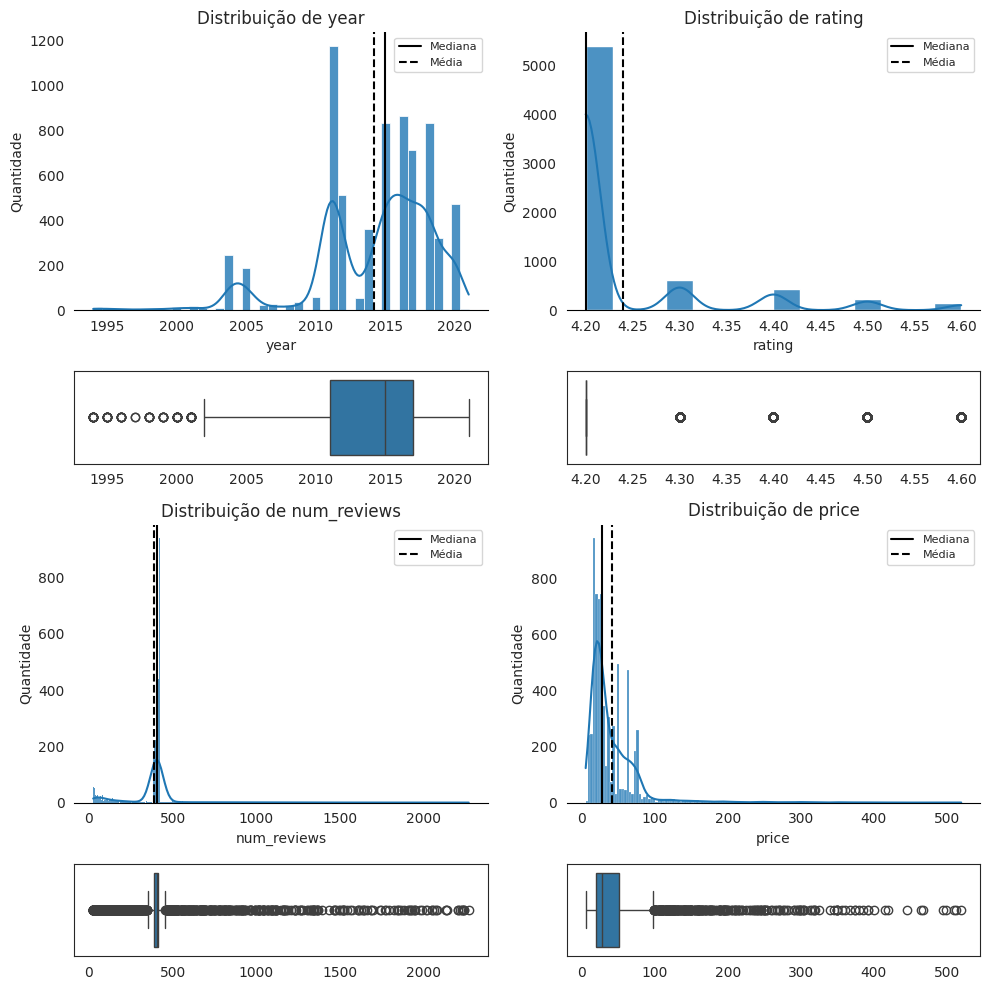

In [ ]:
# @title Vari√°veis quantitativas
variaveis_quantitativas = df_dict.query("tipo == 'quantitativa'").variavel.to_list()

n = len(variaveis_quantitativas)
ncols = 2
nrows = (n + 1) // ncols  # Arredondamento pra cima

fig, axes = plt.subplots(
    figsize=(10, 5 * nrows),
    ncols=ncols,
    nrows=nrows * 2,  # Cada vari√°vel usa 2 linhas: 1 para histograma/KDE, 1 para boxplot
    gridspec_kw={"height_ratios": [3, 1] * nrows}
)

axes = axes.reshape(nrows, 2, 2)  # (vari√°vel, [hist, box], coluna)

for idx, variavel in enumerate(variaveis_quantitativas):
    row = idx // ncols
    col = idx % ncols

    # Histograma + KDE
    ax = sns.histplot(data=df_sem_outliers_zscore, x=variavel, ax=axes[row][0][col], kde=True, alpha=.8)
    ax.axvline(df_sem_outliers_zscore[variavel].median(), color="black", label="Mediana")
    ax.axvline(df_sem_outliers_zscore[variavel].mean(), color="black", linestyle="--", label="M√©dia")
    ax.set(title=f"Distribui√ß√£o de {variavel}", ylabel="Quantidade")
    ax.legend(fontsize=8)
    ax.title.set_size(12)
    ax.spines["bottom"].set_color("black")
    ax.grid(False, axis="x")
    for side in ["left", "top", "right"]:
        ax.spines[side].set_visible(False)

    # Boxplot
    sns.boxplot(data=df_sem_outliers_zscore, x=variavel, ax=axes[row][1][col])
    axes[row][1][col].set(xlabel="")

# Ocultar subplots n√£o usados (caso o n√∫mero de vari√°veis n√£o seja par)
if n % ncols != 0:
    for j in range(2):
        axes[-1][j][1].axis("off")

plt.tight_layout()
plt.show()

## An√°lise Bivariada

### Rela√ß√£o Entre Vari√°veis Quantitativas

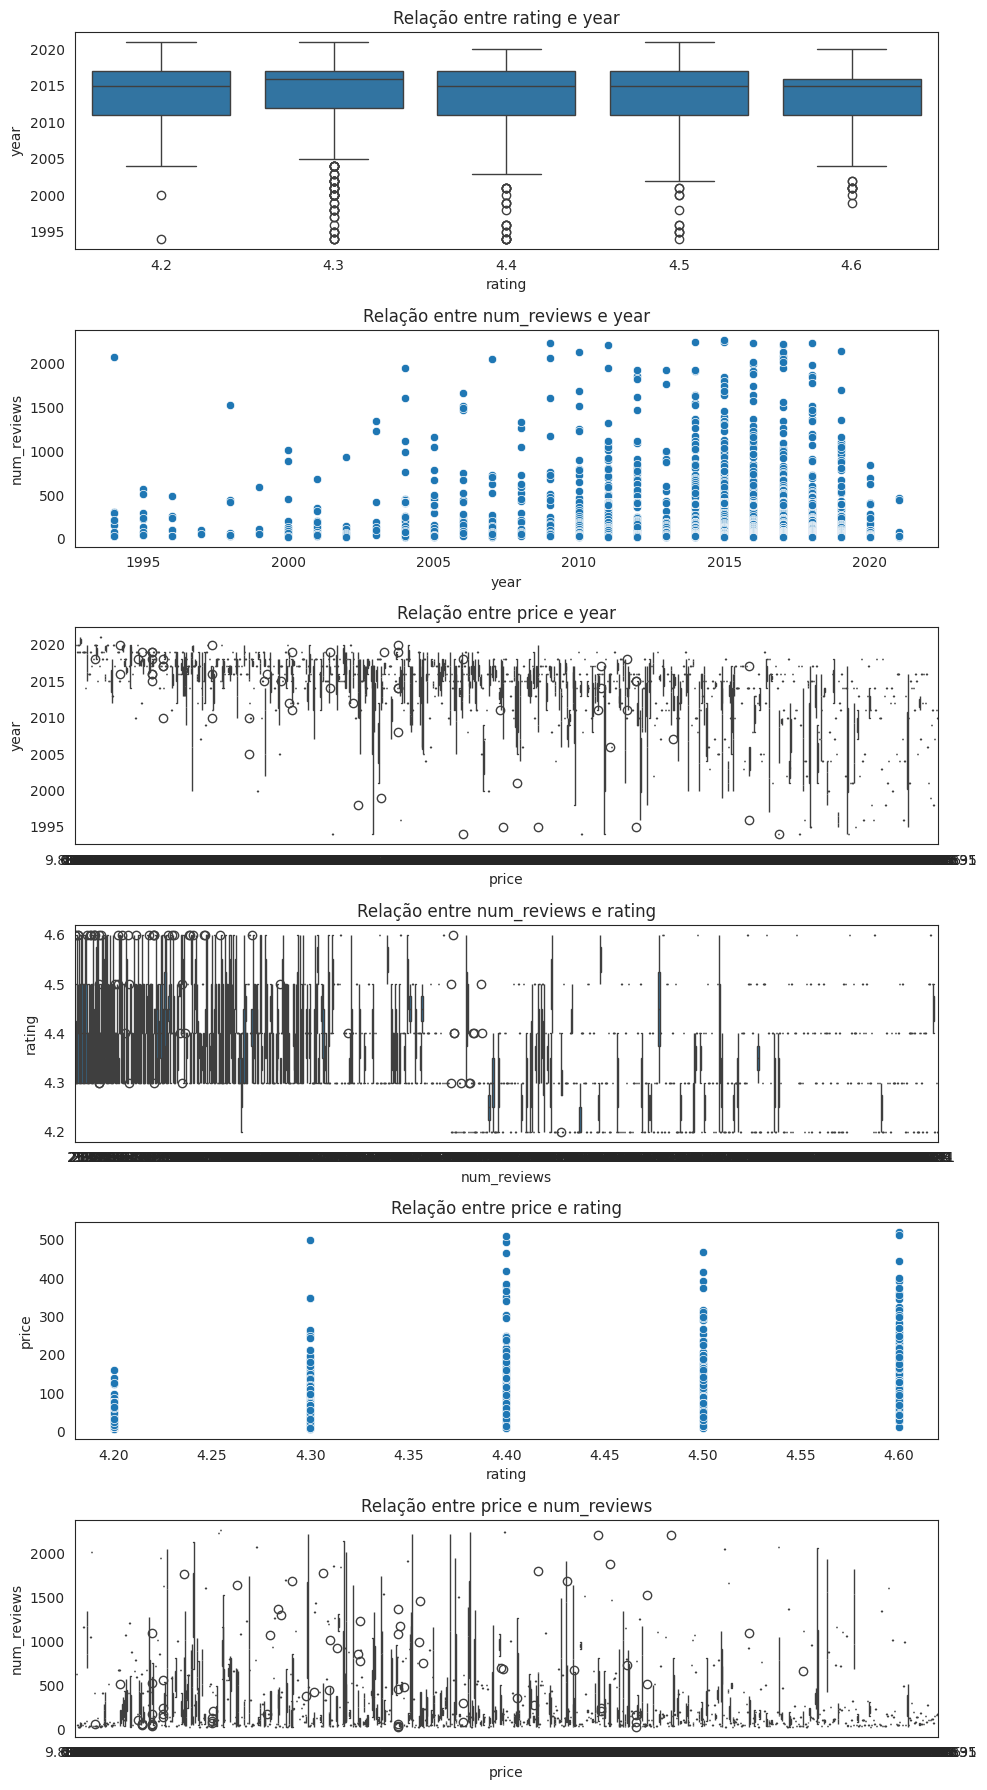

In [ ]:
# @title Comportamento par a par

combinacoes = list(itertools.combinations(variaveis_quantitativas, 2))
num_combinacoes = len(combinacoes)

# Ajustar n√∫mero de colunas e linhas dinamicamente
ncols = 1  # Por exemplo, fixar em 3 colunas
nrows = (num_combinacoes + ncols - 1) // ncols  # Calcular n√∫mero de linhas necess√°rio

fig, axes = plt.subplots(figsize=(10, 3 * nrows), ncols=ncols, nrows=nrows, squeeze=False)
axes = axes.flatten()

for i, (var_1, var_2) in enumerate(combinacoes):
    subtipos = df_dict.query('variavel == [@var_1, @var_2]').subtipo.to_list()
    if len(set(subtipos)) == 1:
        sns.scatterplot(data=df_sem_outliers_zscore, x=var_1, y=var_2, ax=axes[i])
    else:
        sns.boxplot(data=df_sem_outliers_zscore, y=var_1, x=var_2, ax=axes[i])
    axes[i].set(title=f"Rela√ß√£o entre {var_2} e {var_1}")

# Remover eixos n√£o utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

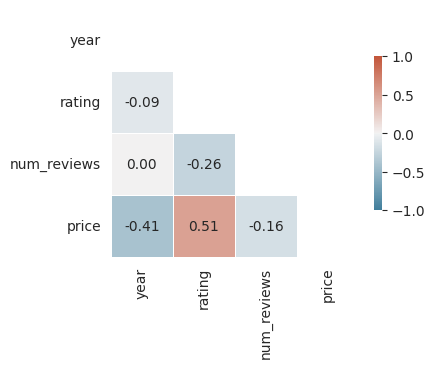

In [ ]:
# @title Correla√ß√£o

corr = df_sem_outliers_zscore.corr(numeric_only=True)

# Gerar uma m√°scara para o tri√¢ngulo
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set_style("white")

# Configurar a figura
f, ax = plt.subplots(figsize=(4, 4))

# Gerar um mapa de calor divergente
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Faz o mapa de calor com a m√°scara e a propor√ß√£o correta
chart = sns.heatmap(
    corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5},
    ax=ax, annot=True, fmt=".2f"
)
plt.show()

## An√°lise multivariada

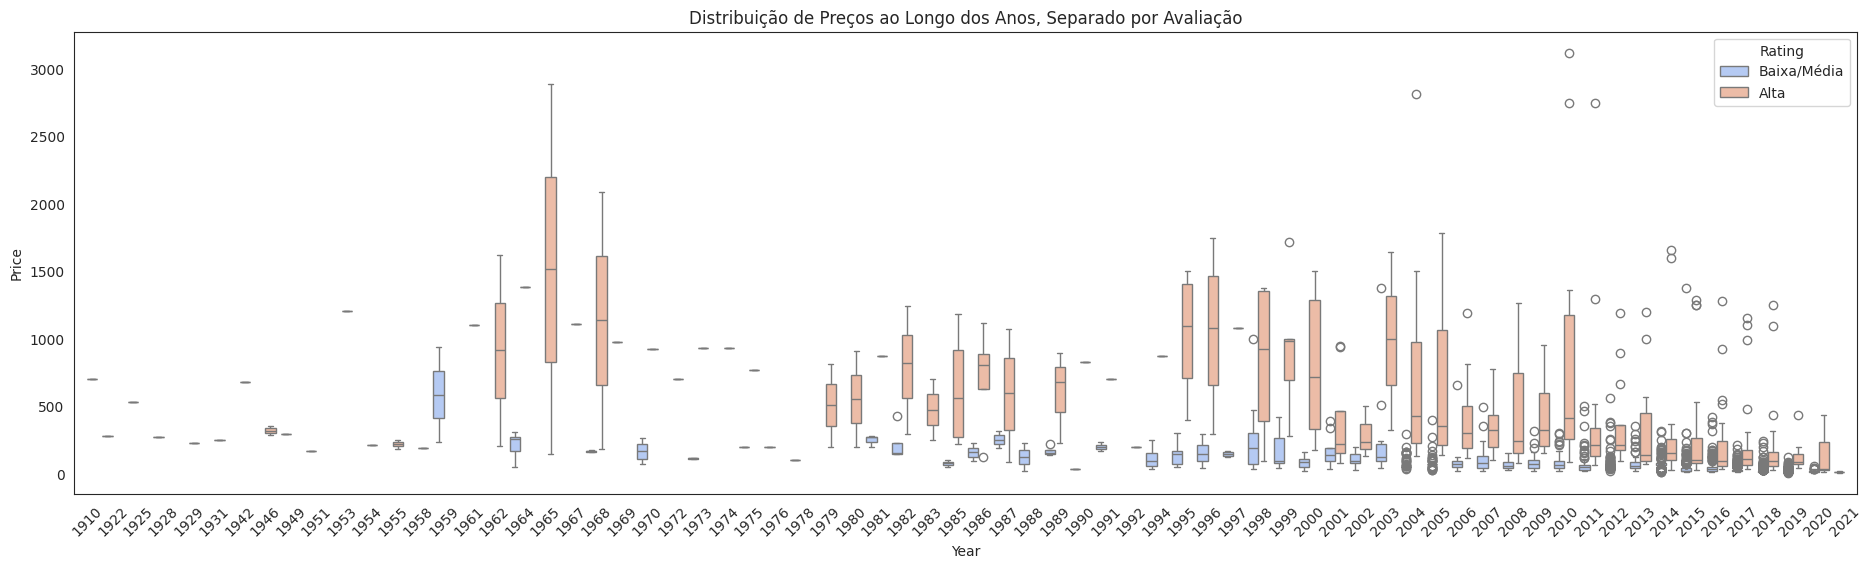

In [ ]:
# @title Distribui√ß√£o de Pre√ßos por Ano  e Faixa de Avalia√ß√£o
#criando uma categoria (ou faixa) de notas
df_filtrado['rating_bin'] = pd.cut(
    df_filtrado['rating'],
    bins=[df_filtrado['rating'].min(), 4.5, df_filtrado['rating'].max()],
    labels=["Baixa/M√©dia", "Alta"],
    include_lowest=True
)

plt.figure(figsize=(23, 6))
sns.boxplot(data=df_filtrado, x='year', y='price', hue=df_filtrado['rating_bin'], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Distribui√ß√£o de Pre√ßos ao Longo dos Anos, Separado por Avalia√ß√£o")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend(title="Rating")
plt.show()

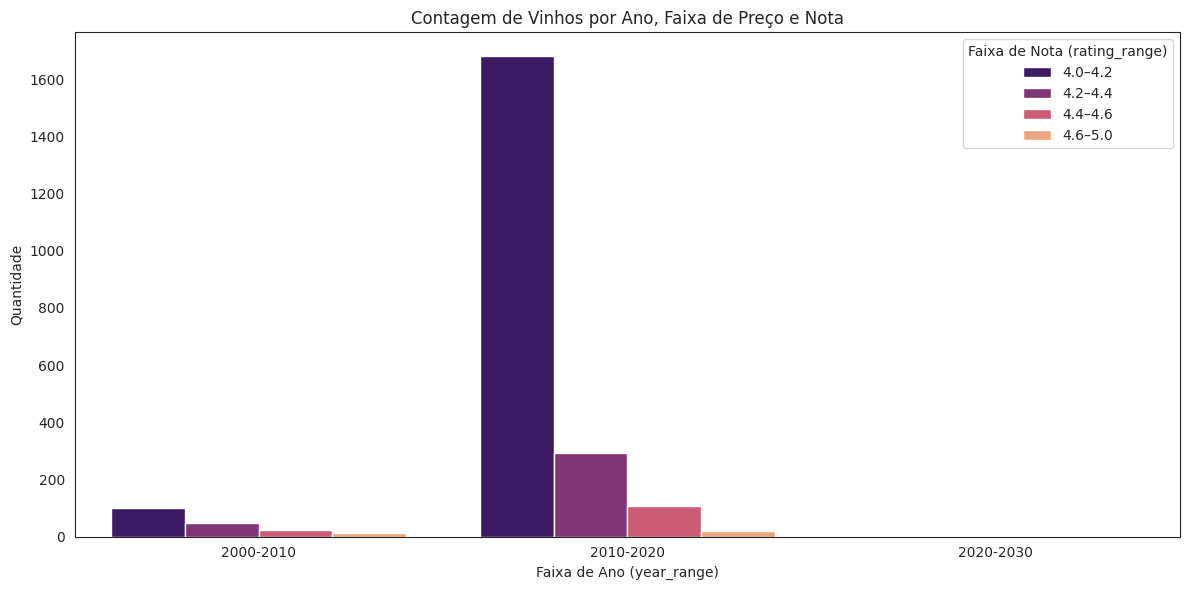

In [ ]:
# @title Gr√°fico de Conting√™ncia da An√°lise Multivariada
# Gr√°fico de barras agrupadas com Seaborn
plt.figure(figsize=(12,6))
sns.barplot(
    data=tabela_plot,
    x='year_range',
    y='count',
    hue='rating_range',
    palette='magma',
    errorbar=None
)
plt.title('Contagem de Vinhos por Ano, Faixa de Pre√ßo e Nota')
plt.xlabel('Faixa de Ano (year_range)')
plt.ylabel('Quantidade')
plt.legend(title='Faixa de Nota (rating_range)')
plt.tight_layout()
plt.show()

## Modelagem

In [ ]:
# @title Compra√ß√£o de modelos

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Copiar o DataFrame tratado
model = df_sem_outliers_zscore.copy()

# Vari√°vel alvo
target = 'price'


# Selecionar features (removendo 'price' e outras que n√£o ajudam, se quiser)
features = model.drop(columns=[target])

# Separar vari√°veis num√©ricas e categ√≥ricas
variaveis_numericas = features.select_dtypes(include=['int64', 'float64']).columns.tolist()
variaveis_categoricas = features.select_dtypes(include=['object']).columns.tolist()

# One-hot encoding para vari√°veis categ√≥ricas
df_dummies = pd.get_dummies(model[variaveis_categoricas], drop_first=True)

# Dataset final para treino
X = pd.concat([model[variaveis_numericas], df_dummies], axis=1)
y = model[target]

# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos a comparar
modelos = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Avaliar todos os modelos
resultados = []

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    resultados.append({"Modelo": nome, "MSE": mse, "R¬≤": r2})

# Mostrar resultados em DataFrame ordenado pelo R¬≤
df_resultados = pd.DataFrame(resultados).sort_values(by="R¬≤", ascending=False)
print("üìä Desempenho dos Modelos:\n")
print(df_resultados)


üìä Desempenho dos Modelos:

              Modelo         MSE        R¬≤
1   Ridge Regression  447.694901  0.743617
0  Linear Regression  501.190288  0.712982
3      Random Forest  539.662091  0.690950
4  Gradient Boosting  565.316977  0.676258
2   Lasso Regression  630.002916  0.639214


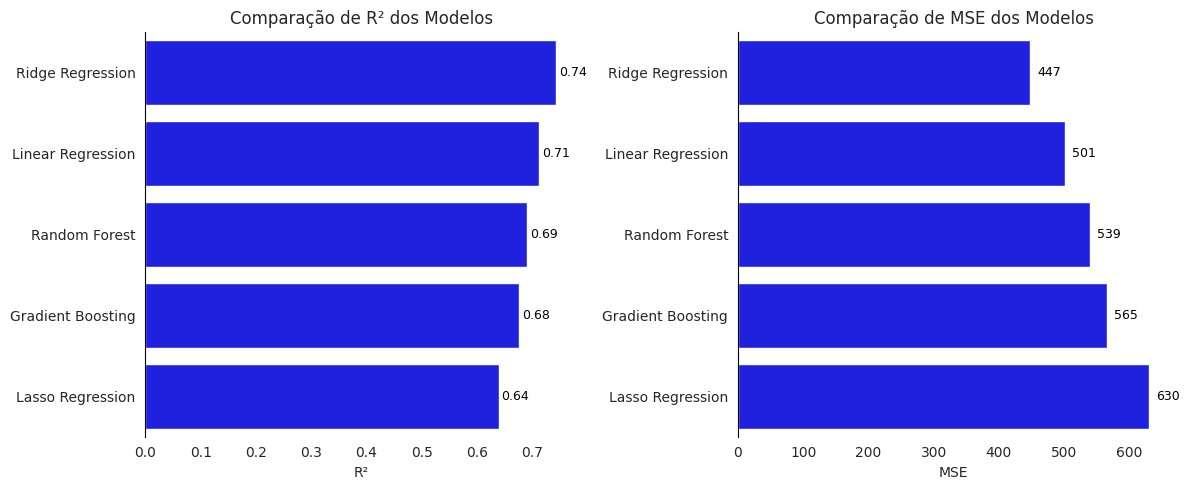

In [ ]:
# @title Gr√°ficos dos modelos
# --- Gr√°ficos ---
plt.figure(figsize=(12, 5))

# Gr√°fico de R¬≤
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x="R¬≤", y="Modelo", data=df_resultados, color="blue")
ax1.bar_label(ax1.containers[0], fmt="%.2f", color="black", label_type="edge", padding=2, fontsize=9)
plt.title("Compara√ß√£o de R¬≤ dos Modelos")
plt.xlabel("R¬≤")
plt.ylabel("")
for side in ["bottom", "top", "right"]:
        ax1.spines[side].set_visible(False)
        ax1.spines["left"].set_color("black")

# Gr√°fico de MSE
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x="MSE", y="Modelo", data=df_resultados.sort_values("MSE"), color="blue")
ax2.bar_label(ax2.containers[0], fmt="%d", color="black", label_type="edge", padding=5, fontsize=9)
plt.title("Compara√ß√£o de MSE dos Modelos")
plt.xlabel("MSE")
plt.ylabel("")
for side in ["bottom", "top", "right"]:
        ax2.spines[side].set_visible(False)
        ax2.spines["left"].set_color("black")

plt.tight_layout()
plt.show()

In [ ]:
# @title Testando otimiza√ß√£o de hiperpar√¢metos

# from sklearn.model_selection import GridSearchCV

# parametros = {
#     'Ridge': {
#         'model': Ridge(),
#         'params': {'alpha': list(range(1, 31))}
#     },
#     'Lasso': {
#         'model': Lasso(max_iter=10000),  # aumentar iter para garantir converg√™ncia
#         'params': {'alpha': [x / 10 for x in range(1, 31)]}  # entre 0.1 e 3.0, mais comum para Lasso
#     },
#     'Random Forest': {
#         'model': RandomForestRegressor(random_state=42),
#         'params': {
#             'n_estimators': [10, 20, 30],  # ou range(1, 31)
#             'max_depth': list(range(1, 31, 5)),  # passo de 5 para n√£o ficar pesado
#             'min_samples_split': [2, 5, 10]  # valores pr√°ticos
#         }
#     },
#     'Gradient Boosting': {
#         'model': GradientBoostingRegressor(random_state=42),
#         'params': {
#             'n_estimators': [50, 100],
#             'learning_rate': [0.01, 0.1],
#             'max_depth': [3, 5]
#         }
#     }
# }

# resultados_otimizados = []

# # Rodar GridSearchCV para cada modelo
# for nome, config in parametros.items():
#     print(f"üîç Otimizando: {nome}...")
#     gs = GridSearchCV(
#         estimator=config['model'],
#         param_grid=config['params'],
#         scoring='r2',
#         cv=5,
#         n_jobs=-1
#     )
#     gs.fit(X_train, y_train)
#     best_model = gs.best_estimator_
#     y_pred = best_model.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)

#     resultados_otimizados.append({
#         "Modelo": nome,
#         "Melhores Par√¢metros": gs.best_params_,
#         "MSE": mse,
#         "R¬≤": r2
#     })

# # Mostrar os resultados
# df_resultados_otimizados = pd.DataFrame(resultados_otimizados).sort_values(by="R¬≤", ascending=False)
# print("\nüìä Desempenho dos Modelos Otimizados:\n")
# print(df_resultados_otimizados)

üîç Otimizando: Ridge...
üîç Otimizando: Lasso...
üîç Otimizando: Random Forest...
üîç Otimizando: Gradient Boosting...

üìä Desempenho dos Modelos Otimizados:

              Modelo                                Melhores Par√¢metros  \
0              Ridge                                       {'alpha': 1}   
3  Gradient Boosting  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...   
2      Random Forest  {'max_depth': 16, 'min_samples_split': 2, 'n_e...   
1              Lasso                                     {'alpha': 0.1}   

          MSE        R¬≤  
0  447.694901  0.743617  
3  509.522845  0.708210  
2  567.588079  0.674958  
1  630.002916  0.639214  


---
O modelo j√° est√° com o melhor hiperpar√™metro.

---


## Conclus√£o
---

Ridge Regression foi o melhor modelo, pois apresentou:

1.	Alto coeficiente de determina√ß√£o (R¬≤): A Ridge Regression alcan√ßou um R¬≤ de 0,74, o que significa que ela explica uma porcentagem maior da variabilidade dos dados em compara√ß√£o com os outros modelos apresentados.
2.	Baixo erro quadr√°tico m√©dio (MSE): O modelo apresenta o menor MSE de 447, indicando que faz previs√µes mais precisas em rela√ß√£o aos dados reais, com menor margem de erro.
Al√©m disso, a Ridge Regression utiliza regulariza√ß√£o, o que ajuda a evitar problemas de sobreajuste (overfitting), garantindo um melhor desempenho em dados novos.
3. Em s√≠ntese, sua combina√ß√£o de alta acur√°cia explicativa (R¬≤ elevado) e baixa margem de erro (MSE) faz dela a escolha mais robusta nesse cen√°rio.
---
